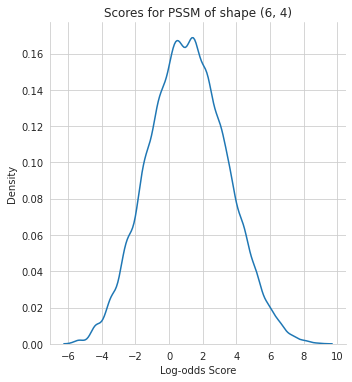

In [ ]:
# Calculate distribution of all possible scores of a motif
from matplotlib import pyplot as plt
import seaborn as sns
import itertools
import numpy as np
from scipy.stats import norm
%matplotlib inline

def calculate_all_possible_scores(matrix):

    iterator = range(4)
    motif_len = len(matrix)

    cartesian_product = list(itertools.product(iterator, repeat=motif_len))

    scores = []
    for c in cartesian_product:
        score = 0
        for i, pos in zip(range(len(c)),c):
            x = matrix[i][pos]

            score += x
        scores.append(score)

    density_plot(scores, smoothness=0.7)  
    return scores


def density_plot(distribution, smoothness=0.5):

    sns.set_style("whitegrid")
    p = sns.displot(all_scores, kind="kde",bw_adjust=smoothness)
    p.set(xlabel="Log-odds Score", title=f"Scores for PSSM of shape {matrix.shape}")
    plt.show()




matrix = np.array([[0.68, -0.32, 1.26, -0.32],
                   [-1.32, 1.49, -0.32, 0.68],
                   [-0.32, 0.26, -1.32, 1.68],
                   [0.26, 0.26, 0.26, 1],
                   [-0.32, 0.26, -1.32, 1.68],
                   [-0.32, 0.26, -1.32, 1.68]], dtype="float16")

all_scores = calculate_all_possible_scores(matrix)



def get_cdf_from_distribution(distribution, plot=False):
    mean = np.mean(distribution)
    std = np.mean(distribution)
    cdf = norm.cdf(distribution, mean, std)
    if plot:
        density_plot(distribution, smoothness=0.5)



cdf = get_cdf_from_distribution(all_scores)

